In [24]:
import wave
obj = wave.open("preamble10.wav","rb")

print("Number of channels", obj.getnchannels())
print("Sample width", obj.getsampwidth())
print("Frame rate.", obj.getframerate())
print("Number of frames", obj.getnframes())
print("parameters:", obj.getparams())
frames = obj.readframes(obj.getnframes())
t_audio = obj.getnframes()/obj.getframerate()
t_audio

frames = obj.readframes(-1)
print(type(frames))
len(frames)


obj.close()

# print(len(frames) / obj.getsampwidth(), frames[0], type(frames[0]))
# obj.close()

sample_rate = 16000.0 # hertz
obj = wave.open("new_file.wav",'wb')
obj.setnchannels(1) # mono
obj.setsampwidth(2)
obj.setframerate(sample_rate)
obj.writeframes(frames)
obj.close()

Number of channels 1
Sample width 2
Frame rate. 22050
Number of frames 211660
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=211660, comptype='NONE', compname='not compressed')
<class 'bytes'>


In [25]:
pip install matplotlib


     |████████████████████████████████| 9.2 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.3 MB/s  eta 0:00:01
     |████████████████████████████████| 965 kB 137.9 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 40.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 9.6 MB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 23.3 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install wave

  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1245 sha256=9f80c3cbcc23197bc85382ae9aa687b51377e4099a8fce234457d7f65a81d520
  Stored in directory: /home/muppuri/.cache/pip/wheels/cb/ee/e6/d2ec86ab2155dbecb9c57ee254d94efa0be06bb6d86b94eea8
Successfully built wave
Note: you may need to restart the kernel to use updated packages.


9.599092970521541


Text(0.5, 0, 'time( s)')

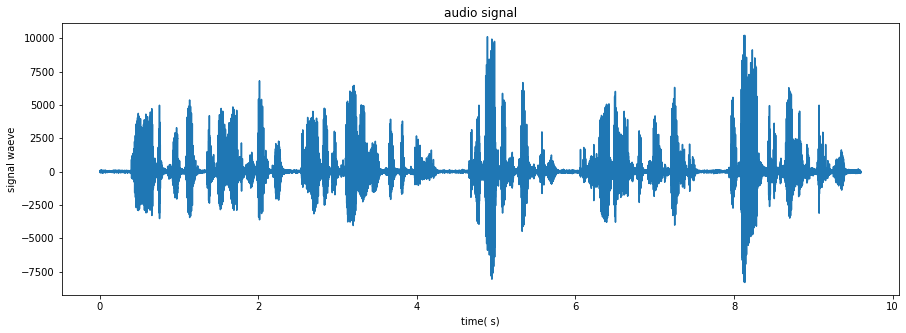

In [7]:
import wave
import matplotlib.pyplot as plt
import numpy as np
obj = wave.open("preamble10.wav","rb")
sample_freq = obj.getframerate()
n_samples=obj.getnframes()
signal_wave = obj.readframes(-1)
obj.close()

t_audio = n_samples/sample_freq
print(t_audio)

signal_array = np.frombuffer(signal_wave,dtype=np.int16)
times=np.linspace(0,t_audio,num=n_samples)
plt.figure(figsize=(15,5))
plt.plot(times,signal_array)
plt.title("audio signal")
plt.ylabel("signal waeve")
plt.xlabel("time( s)")

In [18]:
import pyaudio
import wave
Frames_per_buffer=3200
Format = pyaudio.paInt16
Channels=1
Rate=16000

p=pyaudio.PyAudio()

stream=p.open(format=Format,channels=Channels,rate=Rate,input=True,frames_per_buffer=Frames_per_buffer)
print("start Recording")

seconds=5
frames=[]
for i in range(0,int(Rate/Frames_per_buffer*seconds)):
    data=stream.read(Frames_per_buffer)
    frames.append(data)
stream.stop_stream()
stream.close()
p.terminate()

obj=wave.open("output.wav","wb")
obj.setnchannels(Channels)
obj.setsampwidth(p.get_sample_size(Format))
obj.setframerate(Rate)
obj.writeframes(b"".join(frames))
obj.close()
print("stop recording")

start Recording
stop recording


In [ ]:
6ab1de4d7cfc4811981b11b9dfabc7b4

In [20]:
# upload
import requests
import sys
upload_endpoint='https://api.assemblyai.com/v2/upload'
secret_api_key='6ab1de4d7cfc4811981b11b9dfabc7b4'
filename = sys.argv[1]
def read_file(filename, chunk_size=5242880):
    with open(filename, 'rb') as _file:
        while True:
            data = _file.read(chunk_size)
            if not data:
                break
            yield data

headers = {'authorization': secret_api_key}
response = requests.post(upload_endpoint,
                        headers=headers,
                        data=read_file(filename))

print(response.json())

ConnectionError: [Errno 2] No such file or directory: '-f'